In [11]:
import sys, pathlib
import matplotlib.pyplot as plt

proj_root = pathlib.Path("..").resolve()
if str(proj_root) not in sys.path:
    sys.path.insert(0, str(proj_root))

In [12]:
from src.dataset import build_dataset
from src.config import TARGET_COL, FEATURE_COLS

df_feat = build_dataset()  # maintenant ça merge EURUSD + VIX + taux + SP500 + dollar index

print("Shape:", df_feat.shape)
print("Période:", df_feat["date"].min().date(), "→", df_feat["date"].max().date())
df_feat.head()


Shape: (1250, 38)
Période: 2020-12-23 → 2025-10-23


,date,open,high,low,close,vix,dgs2,dgs10,dtwexbgs,sp500,...,dow_cos,vix_lag1,dgs2_lag1,dgs10_lag1,term_spread,term_spread_lag1,dtwexbgs_ret_lag1,sp500_ret_lag1,close_tomorrow,y_up
0,2020-12-23,1.21641,1.22206,1.21539,1.21904,23.31,0.13,0.96,111.9873,3690.01,...,-0.222521,24.23,0.13,0.93,0.83,0.80,0.002263,-0.002073,1.21807,0
1,2020-12-24,1.21905,1.22158,1.21774,1.21807,21.53,0.13,0.94,111.9873,3703.06,...,-0.900969,23.31,0.13,0.96,0.81,0.83,-0.001905,0.000746,1.22092,1
2,2020-12-28,1.21900,1.22502,1.21815,1.22092,21.70,0.13,0.94,111.9821,3735.36,...,1.000000,21.53,0.13,0.94,0.81,0.81,0.000000,0.003537,1.22534,1
3,2020-12-29,1.22093,1.22751,1.22093,1.22534,23.08,0.12,0.94,111.5240,3727.04,...,0.623490,21.70,0.13,0.94,0.82,0.81,-0.000046,0.008723,1.22974,1
4,2020-12-30,1.22534,1.23100,1.22515,1.22974,22.77,0.12,0.93,111.3156,3732.04,...,-0.222521,23.08,0.12,0.94,0.81,0.82,-0.004091,-0.002227,1.22160,0


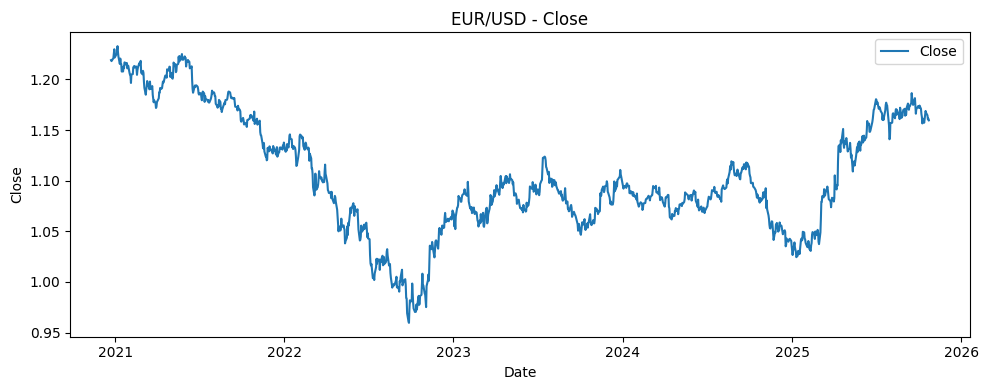

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(df_feat["date"], df_feat["close"], label="Close")
plt.title("EUR/USD - Close")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.tight_layout()
plt.show()


Return moyen: -2.6823741352381082e-05
Return std  : 0.004792265333111733


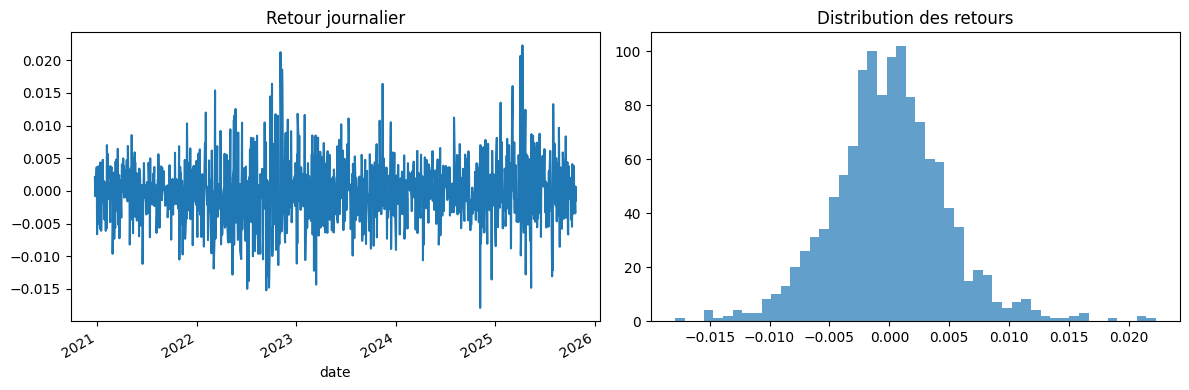

In [14]:
print("Return moyen:", df_feat["ret"].mean())
print("Return std  :", df_feat["ret"].std())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df_feat.set_index("date")["ret"].plot(ax=axes[0], title="Retour journalier")
axes[1].hist(df_feat["ret"].dropna(), bins=50, alpha=0.7)
axes[1].set_title("Distribution des retours")
plt.tight_layout()
plt.show()


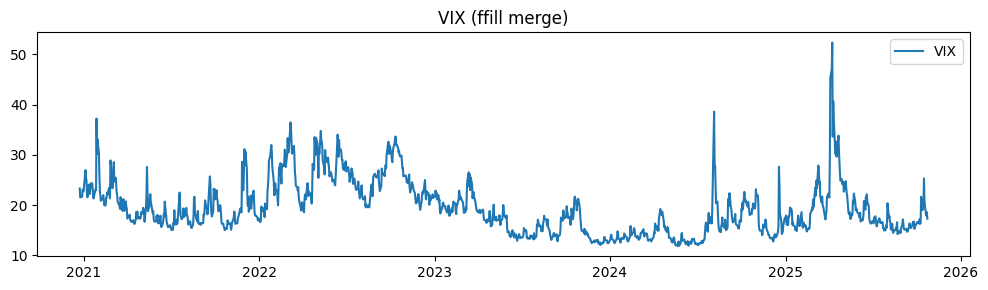

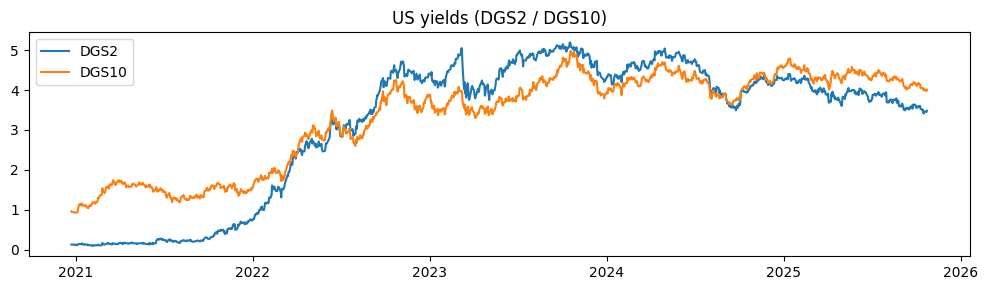

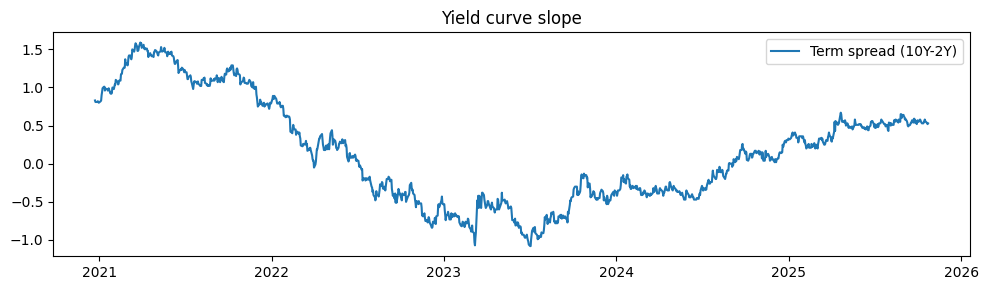

In [15]:
# VIX
plt.figure(figsize=(10, 3))
plt.plot(df_feat["date"], df_feat["vix"], label="VIX")
plt.title("VIX (ffill merge)")
plt.legend()
plt.tight_layout()
plt.show()

# Taux US + spread
plt.figure(figsize=(10, 3))
plt.plot(df_feat["date"], df_feat["dgs2"], label="DGS2")
plt.plot(df_feat["date"], df_feat["dgs10"], label="DGS10")
plt.title("US yields (DGS2 / DGS10)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(df_feat["date"], df_feat["term_spread"], label="Term spread (10Y-2Y)")
plt.title("Yield curve slope")
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
cols_show = ["date", "close", "vix", "dgs2", "dgs10", "dtwexbgs", "sp500"] + FEATURE_COLS + [TARGET_COL]
cols_show = [c for c in cols_show if c in df_feat.columns]

df_feat[cols_show].head(10)


,date,close,vix,dgs2,dgs10,dtwexbgs,sp500,ret_lag1,ret_lag2,ret_lag3,...,macd_hist,dow_sin,dow_cos,vix_lag1,dgs2_lag1,dgs10_lag1,term_spread_lag1,dtwexbgs_ret_lag1,sp500_ret_lag1,y_up
0,2020-12-23,1.21904,23.31,0.13,0.96,111.9873,3690.01,-0.006071,-0.000539,-0.001785,...,-0.000242,0.974928,-0.222521,24.23,0.13,0.93,0.80,0.002263,-0.002073,0
1,2020-12-24,1.21807,21.53,0.13,0.94,111.9873,3703.06,0.002146,-0.006071,-0.000539,...,-0.000604,0.433884,-0.900969,23.31,0.13,0.96,0.83,-0.001905,0.000746,1
2,2020-12-28,1.22092,21.70,0.13,0.94,111.9821,3735.36,-0.000796,0.002146,-0.006071,...,-0.000695,0.000000,1.000000,21.53,0.13,0.94,0.81,0.000000,0.003537,1
3,2020-12-29,1.22534,23.08,0.12,0.94,111.5240,3727.04,0.002340,-0.000796,0.002146,...,-0.000510,0.781831,0.623490,21.70,0.13,0.94,0.81,-0.000046,0.008723,1
4,2020-12-30,1.22974,22.77,0.12,0.93,111.3156,3732.04,0.003620,0.002340,-0.000796,...,-0.000162,0.974928,-0.222521,23.08,0.12,0.94,0.82,-0.004091,-0.002227,0
5,2020-12-31,1.22160,22.75,0.13,0.93,111.3240,3756.07,0.003591,0.003620,0.002340,...,-0.000530,0.433884,-0.900969,22.77,0.12,0.93,0.81,-0.001869,0.001342,1
6,2021-01-04,1.22506,26.97,0.11,0.93,111.2143,3700.65,-0.006619,0.003591,0.003620,...,-0.000586,0.000000,1.000000,22.75,0.13,0.93,0.80,0.000075,0.006439,1
7,2021-01-05,1.22968,25.34,0.13,0.96,110.9649,3726.86,0.002832,-0.006619,0.003591,...,-0.000368,0.781831,0.623490,26.97,0.11,0.93,0.82,-0.000985,-0.014755,1
8,2021-01-06,1.23280,25.07,0.14,1.04,110.8573,3748.14,0.003771,0.002832,-0.006619,...,-0.000084,0.974928,-0.222521,25.34,0.13,0.96,0.83,-0.002243,0.007083,0
9,2021-01-07,1.22661,22.37,0.14,1.08,111.3124,3803.79,0.002537,0.003771,0.002832,...,-0.000369,0.433884,-0.900969,25.07,0.14,1.04,0.90,-0.000970,0.005710,0


In [17]:
from src.modeling import train_test_split_time

X_train, X_test, y_train, y_test = train_test_split_time(df_feat, test_size=0.2)

print("Train:", X_train.shape, "| Test:", X_test.shape)
print("Target balance:", df_feat[TARGET_COL].value_counts(normalize=True).round(3))


Train: (1000, 22) | Test: (250, 22)
Target balance: y_up
0    0.503
1    0.497
Name: proportion, dtype: float64


In [18]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
pred = dummy.predict(X_test)
print("=== Dummy (most_frequent) ===")
print("Accuracy:", round(accuracy_score(y_test, pred), 3))

dummy_s = DummyClassifier(strategy="stratified", random_state=0)
dummy_s.fit(X_train, y_train)
proba = dummy_s.predict_proba(X_test)[:, 1]
print("ROC-AUC (stratified):", round(roc_auc_score(y_test, proba), 3))


=== Dummy (most_frequent) ===
Accuracy: 0.508
ROC-AUC (stratified): 0.52


In [19]:
from src.modeling import build_logreg_pipeline
from src.evaluation import evaluate_classifier

model = build_logreg_pipeline()
model.fit(X_train, y_train)

evaluate_classifier(model, X_train, y_train, X_test, y_test, name="LogReg baseline")


=== LogReg baseline ===
Accuracy: 0.468
ROC-AUC : 0.492
Confusion matrix:
 [[37 90]
 [43 80]]

Classification report:
               precision    recall  f1-score   support

           0      0.463     0.291     0.357       127
           1      0.471     0.650     0.546       123

    accuracy                          0.468       250
   macro avg      0.467     0.471     0.452       250
weighted avg      0.466     0.468     0.450       250



(0.468, 0.4918379105050894)

“VIX is used as external risk sentiment proxy. We use only lagged VIX to avoid leakage.”